<a href="https://colab.research.google.com/github/alphamega89/R_edu/blob/master/Keras_and_traditional_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Lab 1

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

batch_size = 128
num_classes = 10
epochs = 10

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

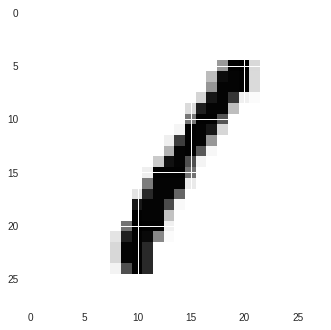

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[3])
print(x_train[3])
print(y_train[3])


In [0]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255  # divide with x_train.max() for normalization
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


60000 train samples
10000 test samples


In [0]:
# define model architecture 
# We use only N number of sample to save time
N = 10000
x_val=x_train[:N]
partial_x_train=x_train[N:]
y_val = y_train[:N]
partial_y_train = y_train[N:]


model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [0]:
# learn
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

history = model.fit(partial_x_train, partial_y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=0, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print(model.summary())


Test loss: 0.069398115517517
Test accuracy: 0.982
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# graph

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
epochs

range(1, 11)

In [0]:
# access training history
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# Records training metrics for each epoch
history.history

{'acc': [0.919499999961853,
  0.9672,
  0.9756800000190735,
  0.98072,
  0.98438,
  0.98622,
  0.988640000038147,
  0.99014,
  0.9904800000190734,
  0.9911],
 'loss': [0.27044105146884917,
  0.1075797828722,
  0.07760229216814041,
  0.058701953586935994,
  0.04802638674080372,
  0.03966390960365534,
  0.034425991590619084,
  0.029584951768815516,
  0.02853240604415536,
  0.02650830752596259],
 'val_acc': [0.9575,
  0.9734,
  0.9744,
  0.9771,
  0.9748,
  0.9799,
  0.9796,
  0.9789,
  0.9806,
  0.9811],
 'val_loss': [0.13587528805732726,
  0.08861596010625362,
  0.084124488536641,
  0.07627687159813941,
  0.08248966384909581,
  0.07404540635563898,
  0.07600965842753649,
  0.07745827967002988,
  0.07392036700285971,
  0.07218522111177444]}

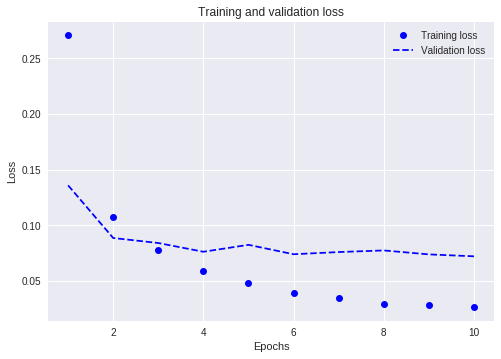

In [0]:
plt.style.use('seaborn')
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b--', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

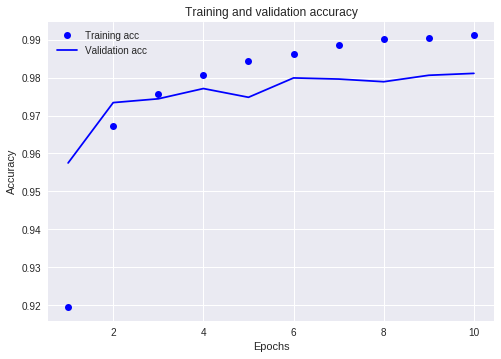

In [0]:
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()